# Clustering Activity

In [25]:
# Import necessary libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import adjusted_rand_score
import skfuzzy.cluster as fuzz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate a hypothetical dataset
X, y_true = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0)

Exercise: Evaluate four clustering algorithms (K-Means, Fuzzy C-Means, Spectral, and Agglomerative)
1. Apply each clustering algorithm to the dataset where:
- cluster_count = 4
- random_state = 42 (where applicable)
- do not specify affinity, metric, algo, init, linkage (if applicable)
2. Use the **Adjusted Rand index** and **Silhouette Score** to evaluate the clustering performance.
3. Compare the performance of the algorithms based on the aforementioned metrics and decide which algorithm is best suited for the data given.

## Generate Data

In [26]:
from sklearn.metrics import adjusted_rand_score, silhouette_score

#define the colors to be used in the plots
colors = ['red', 'orange', 'lime', 'green', 'blue', 'navy', 'violet']
fig_size = 6

# Params of Data Generation
samples = 500  # Number of samples per class
classes = 4     # Number of classes

## Algorithms

### K-Means

c:\Users\PC 05\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Adjusted Rand Score        = 0.99 - KMeans CLustering
Silhouette Score           = 0.79 - KMeans CLustering



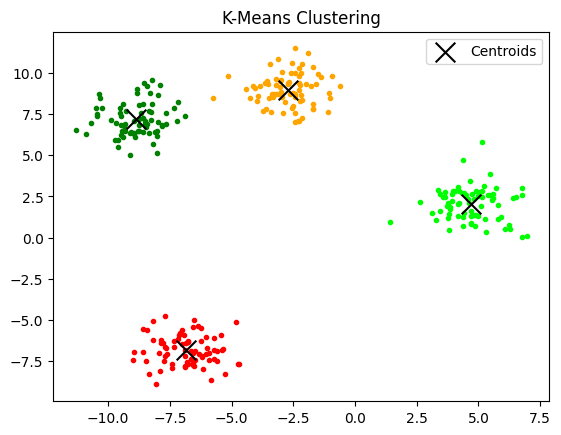

In [27]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=classes).fit(X)
targ = model.predict(X)

for idx, cl in enumerate(np.unique(targ)):
    plt.scatter(X[targ == cl, 0], X[targ == cl, 1], color=colors[idx], marker='.')

centroids = model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='black', label='Centroids')
plt.legend()
plt.title("K-Means Clustering")

if y_true is not None:
    print(f"Adjusted Rand Score        = {adjusted_rand_score(targ, y_true):.2f} - KMeans CLustering")
print(f"Silhouette Score           = {silhouette_score(X, targ):.2f} - KMeans CLustering\n")
plt.show()

### Fuzzy C-Means

            0         1         2         3
0    0.981403  0.012362  0.003375  0.002860
1    0.979807  0.013464  0.003631  0.003099
2    0.042112  0.919297  0.009102  0.029488
3    0.006831  0.004898  0.982481  0.005790
4    0.903676  0.057479  0.022534  0.016311
..        ...       ...       ...       ...
295  0.033564  0.953803  0.003950  0.008682
296  0.006090  0.011867  0.006501  0.975542
297  0.071416  0.906561  0.007237  0.014786
298  0.892542  0.082000  0.012131  0.013327
299  0.875804  0.099153  0.011490  0.013553

[300 rows x 4 columns]
Adjusted Rand Score        = 0.99 - Fuzzy C-Means
Silhouette Score           = 0.79 - Fuzzy C-Means



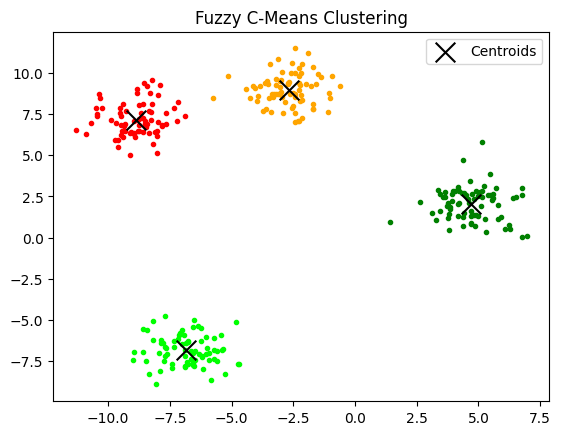

In [28]:
from skfuzzy import cmeans, cmeans_predict

centers, u, u0, d, jm, p, fpc = cmeans(data = X.T, c = classes, m = 2, error = 0.05, maxiter = 1000)
target2 = np.argmax(u, axis=0)

for idx, cl in enumerate(np.unique(target2)):
    plt.scatter(X[target2 == cl, 0], X[target2 == cl, 1], color=colors[idx], marker='.')
    
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, c='black', label='Centroids')
plt.legend()
plt.title("Fuzzy C-Means Clustering")

# Printing membership matrix
print(pd.DataFrame(u.T))

if y_true is not None:
    print(f"Adjusted Rand Score        = {adjusted_rand_score(target2, y_true):.2f} - Fuzzy C-Means")
print(f"Silhouette Score           = {silhouette_score(X, target2):.2f} - Fuzzy C-Means\n")

### Spectral Clustering

Adjusted Rand Score        = 0.99 - Spectral Clustering
Silhouette Score           = 0.79 - Spectral Clustering



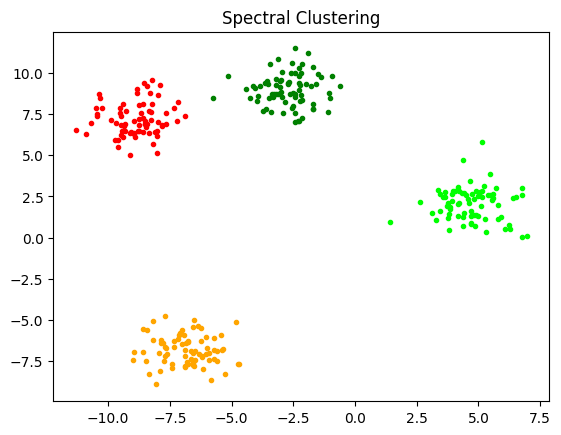

In [29]:
from sklearn.cluster import SpectralClustering

targ = SpectralClustering(n_clusters=classes).fit_predict(X)

for idx, cl in enumerate(np.unique(targ)):
    plt.scatter(X[targ == cl, 0], X[targ == cl, 1], color=colors[idx], marker='.')

plt.title("Spectral Clustering")
if y_true is not None:
    print(f"Adjusted Rand Score        = {adjusted_rand_score(targ, y_true):.2f} - Spectral Clustering")
print(f"Silhouette Score           = {silhouette_score(X, targ):.2f} - Spectral Clustering\n")
plt.show()

### Agglomerative Clustering

Adjusted Rand Score        = 0.99 - Agglomerative Clustering
Silhouette Score           = 0.79 - Agglomerative Clustering



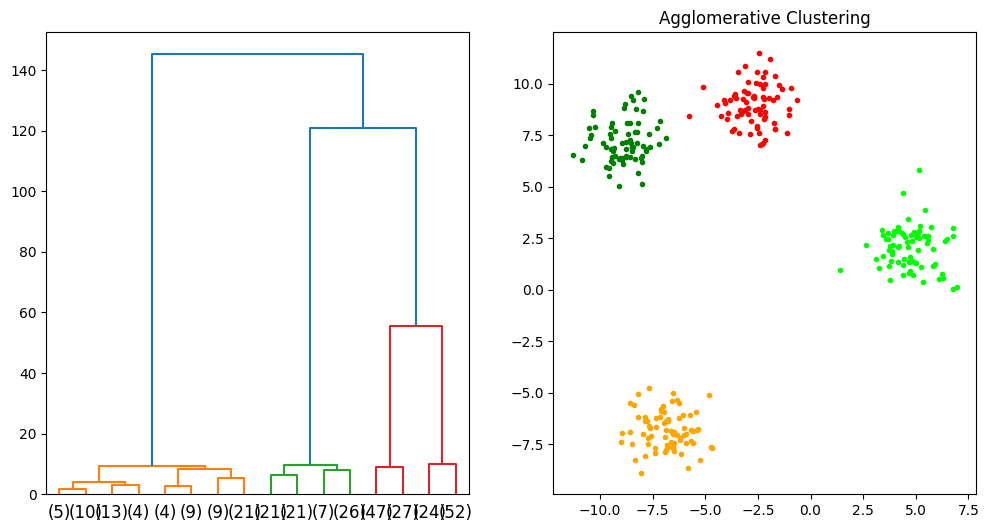

In [35]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

def plot_data(model, ax):
    model.set_params(n_clusters=classes, distance_threshold=None)
    targ = model.fit_predict(X)
    
    if y_true is not None: 
        print(f"Adjusted Rand Score        = {adjusted_rand_score(targ, y_true):.2f} - Agglomerative Clustering")
    print(f"Silhouette Score           = {silhouette_score(X, targ):.2f} - Agglomerative Clustering\n")
    for idx, cl in enumerate(np.unique(targ)):
        ax.scatter(X[targ == cl, 0], X[targ == cl, 1], color=colors[idx], marker='.')
        plt.title(f"Agglomerative Clustering")

fig, axs = plt.subplots(1, 2, figsize=(fig_size * 2, fig_size * 1))

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)

plot_dendrogram(model, truncate_mode="level", p=3, ax=axs[0])
plot_data(model, ax=axs[1])

All algorithms presented the same performance therefore no one algorithm can be considered the best.